In [1]:
import numpy as np
import pandas as pd
from sksurv.datasets import load_whas500
from sksurv.linear_model import CoxPHSurvivalAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

## Load heart attack dataset

In [2]:
X, y = load_whas500()
X = X.astype(float)
display(X)
display(y)

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
0,1.0,83.0,0.0,25.54051,0.0,1.0,78.0,0.0,89.0,5.0,1.0,0.0,0.0,152.0
1,0.0,49.0,0.0,24.02398,0.0,1.0,60.0,0.0,84.0,5.0,0.0,1.0,0.0,120.0
2,0.0,70.0,0.0,22.14290,0.0,0.0,88.0,1.0,83.0,5.0,0.0,1.0,0.0,147.0
3,0.0,70.0,0.0,26.63187,1.0,1.0,76.0,0.0,65.0,10.0,0.0,1.0,0.0,123.0
4,0.0,70.0,0.0,24.41255,0.0,1.0,85.0,0.0,63.0,6.0,0.0,1.0,0.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,76.0,0.0,27.96454,0.0,1.0,88.0,1.0,68.0,1.0,0.0,1.0,0.0,112.0
496,0.0,76.0,0.0,24.26862,0.0,1.0,96.0,1.0,88.0,3.0,0.0,0.0,0.0,208.0
497,1.0,57.0,0.0,42.13576,0.0,1.0,74.0,1.0,123.0,3.0,0.0,0.0,0.0,120.0
498,0.0,67.0,0.0,27.40905,0.0,1.0,62.0,0.0,59.0,1.0,0.0,1.0,0.0,112.0


array([(False, 2.178e+03), (False, 2.172e+03), (False, 2.190e+03),
       ( True, 2.970e+02), (False, 2.131e+03), ( True, 1.000e+00),
       (False, 2.122e+03), ( True, 1.496e+03), ( True, 9.200e+02),
       (False, 2.175e+03), (False, 2.173e+03), ( True, 1.671e+03),
       (False, 2.192e+03), ( True, 8.650e+02), (False, 2.166e+03),
       (False, 2.168e+03), ( True, 9.050e+02), ( True, 2.353e+03),
       (False, 2.146e+03), ( True, 6.100e+01), ( True, 2.358e+03),
       (False, 2.114e+03), (False, 2.132e+03), (False, 2.139e+03),
       (False, 2.048e+03), (False, 2.152e+03), ( True, 6.000e+00),
       (False, 2.156e+03), ( True, 1.180e+02), (False, 2.064e+03),
       ( True, 8.490e+02), ( True, 7.140e+02), (False, 2.057e+03),
       ( True, 2.000e+00), ( True, 7.000e+00), (False, 2.151e+03),
       ( True, 6.000e+00), ( True, 4.220e+02), ( True, 3.540e+02),
       (False, 2.065e+03), (False, 2.048e+03), ( True, 1.065e+03),
       ( True, 5.350e+02), (False, 2.118e+03), ( True, 9.700e+

## Compute model

The cox proportional hazard function is as follows:

$h(t)=h_0(t) \cdot e^{(b_1x_1+b_2x_2+...+b_px_p)}$

In [11]:
model = CoxPHSurvivalAnalysis()
model.fit(X, y)

CoxPHSurvivalAnalysis()

In [12]:
model = CoxPHSurvivalAnalysis()
model.fit(X[:50], y[:50])

InvalidIndexError: (slice(None, 50, None), slice(None, None, None))

In [13]:
X[:5].shape

(5, 14)

## Use model to predict hazard function of individual


In [60]:
chf_funcs = model.predict_cumulative_hazard_function(X.iloc[:5])

chf_funcs[0]

StepFunction(x=array([1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
       7.000e+00, 1.000e+01, 1.100e+01, 1.400e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.200e+01, 2.600e+01, 3.100e+01,
       3.200e+01, 3.300e+01, 3.400e+01, 3.700e+01, 4.200e+01, 4.600e+01,
       4.900e+01, 5.200e+01, 5.300e+01, 5.500e+01, 5.700e+01, 6.000e+01,
       6.100e+01, 6.200e+01, 6.400e+01, 6.900e+01, 7.600e+01, 8.100e+01,
       8.300e+01, 8.800e+01, 9.100e+01, 9.300e+01, 9.500e+01, 9.700e+01,
       1.000e+02, 1.010e+02, 1.080e+02, 1.090e+02, 1.130e+02, 1.160e+02,
       1.170e+02, 1.180e+02, 1.290e+02, 1.320e+02, 1.340e+02, 1.350e+02,
       1.370e+02, 1.400e+02, 1.430e+02, 1.450e+02, 1.460e+02, 1.510e+02,
       1.660e+02, 1.690e+02, 1.870e+02, 1.920e+02, 1.970e+02, 2.000e+02,
       2.260e+02, 2.330e+02, 2.350e+02, 2.590e+02, 2.690e+02, 2.740e+02,
       2.870e+02, 2.890e+02, 2.950e+02, 2.970e+02, 3.120e+02, 3.130e+02,
       3.210e+02, 3.280e+02, 3.430e+

(0.0, 1.0)

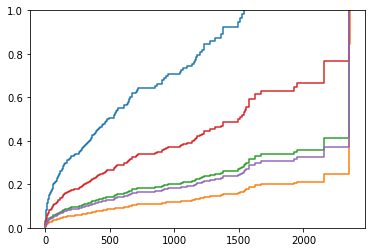

In [61]:
for fn in chf_funcs:
    plt.step(fn.x, fn(fn.x), where="post")
    
plt.ylim(0, 1)

In [62]:
pd.DataFrame(data=zip(model.feature_names_in_, model.coef_))

,0,1
0,afb,0.035177
1,age,0.047308
2,av3,0.307573
3,bmi,-0.047145
4,chf,0.732026
5,cvd,-0.056317
6,diasbp,-0.012651
7,gender,-0.290754
8,hr,0.012086
9,los,-0.006817
